In [1]:
 !pip install --upgrade pip

In [3]:
!python -m venv tf_env


In [2]:
!tf_env\Scripts\activate


In [4]:
!pip install tensorflow


In [11]:
!pip uninstall tensorflow
!pip install tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\User\\Desktop\\disease detection with CNN\\tf_env\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install pandas

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.1-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install matplotlib

  Using cached matplotlib-3.9.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/168.5 kB 682.7 kB/s eta 0:00:01
     --------------------- ----------------- 92.2/168.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 168.5/168.5 kB 1.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    'C:/Users/User/Desktop/disease detection with CNN/Plant_leave_diseases_dataset_without_augmentation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'C:/Users/User/Desktop/disease detection with CNN/Plant_leave_diseases_dataset_without_augmentation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 44371 images belonging to 39 classes.
Found 11077 images belonging to 39 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\User\Desktop\Fake News Detection\spacy_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
!pip install scipy

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)


c:\Users\User\Desktop\Fake News Detection\spacy_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.2957 - loss: 2.7087

c:\Users\User\Desktop\Fake News Detection\spacy_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1387/1387 ━━━━━━━━━━━━━━━━━━━━ 782s 563ms/step - accuracy: 0.2958 - loss: 2.7084 - val_accuracy: 0.5574 - val_loss: 1.5263
Epoch 2/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 752s 542ms/step - accuracy: 0.5705 - loss: 1.4833 - val_accuracy: 0.7353 - val_loss: 0.8820
Epoch 3/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 755s 544ms/step - accuracy: 0.6485 - loss: 1.1781 - val_accuracy: 0.7671 - val_loss: 0.7663
Epoch 4/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 742s 535ms/step - accuracy: 0.6844 - loss: 1.0362 - val_accuracy: 0.8204 - val_loss: 0.5991
Epoch 5/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 742s 535ms/step - accuracy: 0.7238 - loss: 0.8952 - val_accuracy: 0.8326 - val_loss: 0.5604
Epoch 6/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 714s 515ms/step - accuracy: 0.7484 - loss: 0.8113 - val_accuracy: 0.8584 - val_loss: 0.4605
Epoch 7/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 861s 621ms/step - accuracy: 0.7700 - loss: 0.7430 - val_accuracy: 0.8668 - val_loss: 0.4223
Epoch 8/20
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 910s 656ms/step - accuracy: 0.7

In [10]:
# Test dataset generator
test_generator = datagen.flow_from_directory(
    'C:/Users/User/Desktop/disease detection with CNN/Plant_leave_diseases_dataset_with_augmentation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 61486 images belonging to 39 classes.
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 207s 108ms/step - accuracy: 0.8959 - loss: 0.3537
Test Accuracy: 90.30%


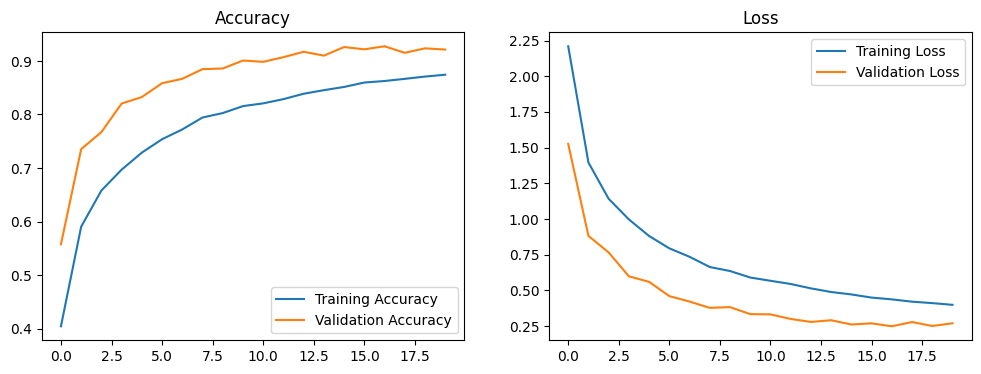

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [13]:
model.save('vgg16_plant_disease_model.h5')
